# Section 3: Series  Methods and Handling
This section will cover the following topics:


*   series structure, item count, NaNs (aka NA's or nulls, which are common features of real-world data)
*   descriptive statistics
*   series arithmetics
*   sorting series
*   filtering and custom transformations





In [1]:
import pandas as pd
import numpy as np

## Reading in Data with `read_csv()`

Pandas has a powerful method called `read_csv()` that can be used to read csv files into dataframes.
*   `read_csv()` has over a dozen different possible parameters, but most of the time you won't need to specify most of them
*   Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html



Start by reading in the file **drinks.csv** using `read_csv()`. If the file is local, you would pass the file path to the `read_csv()` method. However, if the file is hosted remotely, you can simply pass the URL to the file.

In [2]:
drinks_df = pd.read_csv('https://gist.githubusercontent.com/sh7ata/e075ff35b51ebb0d2d577fbe1d19ebc9/raw/b966d02c7c26bcca60703acb1390e938a65a35cb/drinks.csv')
drinks_df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


This object that we've created is NOT a series - rather, it is a dataframe. We will cover dataframes extensively in the next section.
For now, let's pare this down and select just the **country** and **wine_servings** columns. We can specify the columns using the `usecols` parameter

In [3]:
wine = pd.read_csv('https://gist.githubusercontent.com/sh7ata/e075ff35b51ebb0d2d577fbe1d19ebc9/raw/b966d02c7c26bcca60703acb1390e938a65a35cb/drinks.csv', usecols=['country','wine_servings'])
wine

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


Next, let's set the country column as the index. This can be done using the `index_col` parameter in the `read_csv()` call. This will replace the integer indices with the country names!
Alternatively, we could have used the `.set_index()` method which allows you to choose a column of an existing dataframe to change set as the index. More info here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html?highlight=set_index#pandas.DataFrame.set_index
The code to do this would have been:
`wine.set_index('country')`

In [4]:
wine = pd.read_csv('https://gist.githubusercontent.com/sh7ata/e075ff35b51ebb0d2d577fbe1d19ebc9/raw/b966d02c7c26bcca60703acb1390e938a65a35cb/drinks.csv', usecols=['country','wine_servings'], index_col = 'country')
wine

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,NaN


In [5]:
wine.head()

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0


Note that even though we only have one column of values and its associated labels (country), this is technically still a dataframe and NOT a series. This is because `read_csv()` always returns a dataframe from a CSV. You'll notice that it looks visually different from a series as well, with the column labels positioned differently.


*   However, you can use the `squeeze` parameter in `read_csv` in order to return a dataframe if the parsed data contains only one column. `squeeze` is set to `False` by default




In [6]:
type(wine)

pandas.core.frame.DataFrame

In [7]:
wine = pd.read_csv('https://gist.githubusercontent.com/sh7ata/e075ff35b51ebb0d2d577fbe1d19ebc9/raw/b966d02c7c26bcca60703acb1390e938a65a35cb/drinks.csv', usecols=['country','wine_servings'], index_col = 'country', squeeze = True)
wine

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

`wine` is now a Series instead of a dataframe

In [8]:
type(wine)

pandas.core.series.Series

## Series Sizing with `.size`, `.shape`, and `len()`

Recall that **attributes** give you properties of the series, whereas **methods** perform actions. In this lecture we'll explore series attriburtes

The **size** attribute gives you the length of the series. In the example below, we see that the `wine` series has 193 observiations, for a length of 193.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.size.html

In [9]:
wine.size

193

We can also check the sizes of the series values and index components separately. Using the `.values` attribute, we get an array containing the values for the series.

In [10]:
wine.values

array([ nan,  54.,  14., 312.,  45.,  45., 221.,  11., 212., 191.,   5.,
        51.,   7.,  nan,  36.,  42., 212.,   8.,  13.,  nan,   8.,   8.,
        35.,  16.,   1.,  94.,   7.,  nan,   7.,  16.,   1.,   4.,   1.,
         1.,   1., 172.,   8.,   3.,   1.,   9.,  74.,  11., 254.,   5.,
       113., 134.,  nan,   1., 278.,   3.,  26.,   9.,   3.,   1.,   2.,
       233.,  nan,  59.,  nan,   1.,  97.,  37.,  59.,   1., 149., 175.,
         1., 218.,  28.,   2.,   2.,  21.,   1.,   1.,   2., 185.,  78.,
        nan,  nan,  nan,  nan, 165.,   9., 237.,   9.,  16.,   1.,  12.,
         2.,   1.,  nan,   6., 123.,  62.,  31.,  nan,   2.,  nan,  56.,
       271.,   4.,   1.,  nan,  nan,   1.,  12.,  nan,  nan,  18.,   5.,
        18.,  nan,   8., 128.,   1.,   5.,  nan,   1.,   8.,  nan,  19.,
       175.,   1.,   1.,   2.,   7., 129.,   1.,  nan,  23.,  18.,   1.,
        74.,  21.,   1.,  56., 339.,   7.,   9.,  18., 167.,  73.,  nan,
        32.,  71.,  11.,  24.,  nan,  14.,  nan,   

The values array actually has its own `.size` attribute.

In [11]:
wine.values.size

193

Similarly, we use the `.index` attribute to get an array of the indices. It too has its own `.size` attribute

In [12]:
print(wine.index)
print('The size of wine.index is {}'.format(wine.index.size))

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)
The size of wine.index is 193


The `.shape` attribute returns a *tuple* that provides the dimensions of the series or dataframe in (rows, columns). Since series are one-dimensional, the shape will be a tuple with just one element.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shape.html

In [13]:
print(wine.shape)

(193,)


Finally, the built-in `len()` function from Python will also give you the size of the series
* https://docs.python.org/3/library/functions.html#len

In [14]:
print(len(wine))

193


## Unique Values and Series Monotonicity

The `is_unique` attribute is an intreresting attribute that checks whether a series contains a sequence of unique values. That is, it checks whether every value in the series is different.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.is_unique.html

For our wine series, the series in its entirety is not unique because two or more of the values are identical. However, if we take just the first five values, those are unique.

In [15]:
print(wine.is_unique)
print(wine.head(5).is_unique)

False
True


The `nunique()` method returns the number of unique values in the series.
* Note that `nunique()` disregards 'NA' values by default. You can set the `dropna` parameter to True in order to include it. 
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html

In [16]:
print(wine.nunique())
print(wine.nunique(dropna = False))

71
72


The `is_monotonic` attribute returns a boolean that determines if the values in the object are monotonic_increasing. 
* **Monotonicity** refers to whether the series values are always increasing (or staying the same) or always decreasing (or staying the same)
* Keep in mind that the `is_monotonic` attribute is actually an alias for the `monotonic_increasing` attribute.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.is_monotonic.html



In [17]:
print(pd.Series([1,2,3]).is_monotonic)
print(pd.Series([1,2,2,2,3,10,100]).is_monotonic)
print(pd.Series([1,2,1,1,3]).is_monotonic)
print(pd.Series([1,2,1,1,3, -10]).is_monotonic)


True
True
False
False


How do we use `is_monotonic` to test for decreasing monotonicity? To do this, we can wrap `is_monotonic` in a `reversed()` method.
* https://docs.python.org/3/library/functions.html#reversed

In [18]:
print(pd.Series([10,9,8,7,6,5,4,3,2,1]).is_monotonic)
print(pd.Series(reversed([10,9,8,7,6,5,4,3,2,1])).is_monotonic)

False
True


## The `count()` Method

The `count()` method is a convenient method that allows you to count the values in your series. What makes it different from `.size` is that `.count()` returns the **total number of non-NA/non-null values**, whereas `.size` includes those values.
* NA or null values are like gaps in the data, indicating absence of information
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.count.html

In [19]:
print(wine.size)
print(wine.count())

193
162


We can make this more formal by using the `.hasnans` attribute to determine whether a series has any `nans`

In [20]:
print(wine.hasnans)

True


## Accessing and Counting NAs/Nulls
* Nulls and NAs indicate the absence of data

The `isnull()` method is used on a Series to return a same-sized object indicating if the corresponding values are NA values
* NA valeus include None, NaN, NA, and Null
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isnull.html#pandas.Series.isnull

In [21]:
wine.isnull()

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

Great, we have a Series of booleans indicating whether that value is Null. But that's not terribly helpful. How do we get the actual countries instead of a Series of booleans?
We can use the output of `isnull()` as a **boolean mask** to get the actual countries!


In [22]:
wine[wine.isnull()]

country
Afghanistan        NaN
Bangladesh         NaN
Bhutan             NaN
Burundi            NaN
North Korea        NaN
Eritrea            NaN
Ethiopia           NaN
India              NaN
Indonesia          NaN
Iran               NaN
Iraq               NaN
Kuwait             NaN
Lesotho            NaN
Libya              NaN
Malaysia           NaN
Maldives           NaN
Marshall Islands   NaN
Mauritania         NaN
Monaco             NaN
Myanmar            NaN
Nepal              NaN
Pakistan           NaN
Rwanda             NaN
San Marino         NaN
Saudi Arabia       NaN
Somalia            NaN
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, dtype: float64

What we got back from the above call was a new series in which only the countries without wine serving data are selected. However, for that reason, the Series values of NaN are not very useful. So if we want only the country names, we can use an index call.

In [23]:
wine[wine.isnull()].index

Index(['Afghanistan', 'Bangladesh', 'Bhutan', 'Burundi', 'North Korea',
       'Eritrea', 'Ethiopia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kuwait',
       'Lesotho', 'Libya', 'Malaysia', 'Maldives', 'Marshall Islands',
       'Mauritania', 'Monaco', 'Myanmar', 'Nepal', 'Pakistan', 'Rwanda',
       'San Marino', 'Saudi Arabia', 'Somalia', 'Sri Lanka', 'Sudan',
       'Tajikistan', 'Uganda', 'Yemen'],
      dtype='object', name='country')

Going one step further, we can transform this into a regular Python list by using the `list()` constructor. This list can then be used however you'd like

In [24]:
list(wine[wine.isnull()].index)

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'Burundi',
 'North Korea',
 'Eritrea',
 'Ethiopia',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Uganda',
 'Yemen']

How do we count null values in a series? One way is to just find the length of the list that we just generated. This works, but it's unwieldy because we first had to isolate the nulls in a series by obtaining a boolean mask, then apply that mask to the series, and then find the length of the series isolated by the boolean mask.

In [25]:
len(list(wine[wine.isnull()].index))

31

A more *pandorabe* (adorable and involving pandas) way to do this is to chain the `isnull()` method with the `sum()` method. 
* Normally, the `sum()` method will sum all of the values in a series. However, when operating on a boolean series, it will treat *True* as 1 and *False* as 0, which is true for Python in general. Therefore, the sum will simply be the sum of the number of `True` values, which in this case corresponds to the values that are Null.

In [26]:
print(pd.Series([True, False, True]).sum())

print(wine.isnull().sum())

2
31


Finally, let's ensure the count of values by type is fully accounted for. That is, the null and non-null values should add up to the total size of the series. Let's test this!

In [27]:
all = wine.size

In [28]:
nonnulls = wine.count()

In [29]:
nulls = wine.isnull().sum()

In [30]:
all == nonnulls + nulls

True

A final note is that `isnull()` and `isna()` are aliases of each other. You can use either.

## Another Approach for Isolating Nulls
Might look more elegant. It uses a Numpy universal function (`ufunc`), which allows us to perform vectorized operations.
* Vectorized operations work on an entire collection at once, as opposed to applying the operation to one element of a collection at a time
* It is not recommended to use `ufunc` directly because they can be very picky and finicky
* https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs
* https://numpy.org/doc/stable/reference/generated/numpy.isnan.html#numpy.isnan

Let's create a simple series of booleans, a null value, and an integer.



In [31]:
ser = pd.Series(data = [True, False, None, 2], dtype = float)
print(ser)

0    1.0
1    0.0
2    NaN
3    2.0
dtype: float64


No, use the `np.isnan()` function on this series. What returns is a numpy array of booleans that describes whether each value in the series is or is not a null (NaN) value
* Booleans are NOT Null values, nor is the integer `2`

In [32]:
np.isnan(ser)

0    False
1    False
2     True
3    False
dtype: bool

Instead of passing a Pandas series to the `np.isnan()` function, we could also take a reference of a numpy ufunc and pass it directly to the series.
* This is indexing by a callable function! It will essentially test every value in the `wine` series using the `np.isnan()` function, and will only select the values that return as **True** from the function.

In [33]:
print(wine[np.isnan])
print(wine[np.isnan].size)

country
Afghanistan        NaN
Bangladesh         NaN
Bhutan             NaN
Burundi            NaN
North Korea        NaN
Eritrea            NaN
Ethiopia           NaN
India              NaN
Indonesia          NaN
Iran               NaN
Iraq               NaN
Kuwait             NaN
Lesotho            NaN
Libya              NaN
Malaysia           NaN
Maldives           NaN
Marshall Islands   NaN
Mauritania         NaN
Monaco             NaN
Myanmar            NaN
Nepal              NaN
Pakistan           NaN
Rwanda             NaN
San Marino         NaN
Saudi Arabia       NaN
Somalia            NaN
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, dtype: float64
31


## The `notnull()` and `notna() Methods

The `notnull()` method returns a series of booleans indicating whether each record is NOT Null
* A Null value will give False
* A non-Null value will give True
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.notnull.html

In [34]:
wine.notnull()

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

This can be used as a boolean mask to index the non-nulls only

In [35]:
wine.loc[wine.notnull()]

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

And we can use `notnull()` combined with the `.sum()` method to add up the number of True's (basically add up the count of values that are not null)

In [36]:
wine.notnull().sum()

162

To prove that `notnull()` and `isnull()` methods are complementary, let's add their results together to ensure they add up to the total length of the series (spoiler: they do)

In [37]:
wine.notnull().sum() + wine.isnull().sum() == wine.size

True

The `notnull()` method has an aliased method called `notna()`

*   https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.notna.html



## Booleans are Literally Numbers in Python!
* `True` is simply a keyword for the integer `1`
* `False` is simply a keyword for the integer `0`


In [38]:
True + 19

20

In [39]:
True + True - False + (True * 3)

5

Just like in regular division, you cannot divide by zero

In [40]:
5 / False

ZeroDivisionError: ignored

Another way to say this is that the `bool` types *inherit* from the `int` class. Inheritance is a facet of object-oriented programming. If we examine the method resolution order (MRO), we will see that it looks for methods first within the `bool` object type, next within the `int` object type, and finally within the `object` object type

In [ ]:
print(type(True))
print(type(False))
bool.__mro__

This explains why we are able to call the `sum()` method, which operates on integers, on a list of boolean values and it will work!

## Dropping and Filling NAs

The `dropna()` method simply returns a **new** series with the NA values dropped
* Important: it does NOT alter the original series UNLESS the `inplace` argument is set to True, or if the variable name for the original series is reassigned to the new series
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html

In [ ]:
wine.dropna()

Another approach to dealing with NAs is to replace them with something that is more meaningful or computational useful. This is accomplished with the `fillna()` method. This method requires passing in a value that you want to replace the NA values with.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html

In [ ]:
print(wine)
print(wine.fillna(100, inplace=False))

## Descriptive Statistics Using Series
* Pandas features several methods that allow you to calculate useful descriptive statistics for data Series

To find the **average** value of your series, you can calculate it manually by using the `sum()` method and then dividing the result by  the `count()`

In [42]:
average_manual = wine.sum() / wine.count()
average_manual

50.74691358024691

A better and faster way to do it by using the `mean()` method.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html

In [43]:
wine.mean()

50.74691358024691

You can also calculate the median value (the value at the very middle of a list of numbers, or the 50th percentile), using the `median()` method
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.median.html

In [44]:
wine.median()

11.5

Note that in the above example, the median is much smaller than the mean. This signifies that most of the values are below the mean, and there are just a handful of very large values that skew the mean upward.

Another way to say this is that the wine servings are right-skewed, or positively skewed. 
* Right-skewed (or positively skewed) means that the distribution of the data has a drawn out tail on the right, and most of the data is on the left
* Left-skewed (or negatively skewed) means that the distribution of the data has a drawn out tail on the left, and most of the data is on the right
* https://en.wikipedia.org/wiki/Skewness


Let's visualize the data to see what it actually looks like? We'll do more with data viz later, but for now we'll just use the Pandas built-in `hist()` function to construct a histogram of the series. As we can see , most countries have between 0 and 50 wine servings, and the data is heavily right-skewed

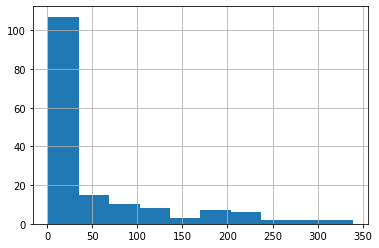

In [48]:
wine.hist()

We can also calculate quantiles!
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html

In [47]:
print(wine.quantile(0.5))
print(wine.quantile(0.25))
print(wine.quantile(0.75))

11.5
3.0
61.25


We can calculate the **interquartile range** (or IQR), which is the difference between the 75th and 25th percentiles

In [50]:
iqr = wine.quantile(0.75) - wine.quantile(0.25)
iqr

58.25

Pandas has built-in `min()` and `max()` functions which, as you imagine, return the smallest and largest values of the series, repsectively
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.min.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.max.html

In [51]:
print(wine.min())
print(wine.max())

1.0
339.0


The built-in functions `var()` and `std()` allow you to calculate the variance and standard deviation of the data, respectively. Both provide a measurement of how widely the data are distributed around the mean.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.std.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.var.html

In [53]:
print(wine.std())
print(wine.var())
print(wine.std() ** 2 == wine.var())

76.13491716376173
5796.52561153286
True
